In [1]:
ticker = "KORI.PA"

In [2]:
# Parameters
ticker = "ADUS"


In [3]:
import yfinance as yf
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


stock = yf.Ticker(ticker)
dax = yf.Ticker("^GDAXI")
sp = yf.Ticker("^GSPC")

#### stock history values
history_5y = stock.history(period='5y')['Close']
history_1y = stock.history(period='1y')['Close']
history_since_corona = history_1y[history_1y.index >= '2020-02-20']

dax_5y = dax.history(period='5y')['Close']
dax_1y = dax.history(period='1y')['Close']
sp_5y = sp.history(period='5y')['Close']
sp_1y = sp.history(period='1y')['Close']


def get_stock_info(label):
    try:
        value = stock.info[label]
    except:
        value = None
    return value

#### df values: "name", "symbol", "sector", "industry", "country", "business_summary", "ret_since_corona", "ret_1y", "ret_5y", "ret_1y_wo_corona", "ret_5y_wo_corona", "perc_diff_dax_1y_wo_corona", "perc_diff_dax_5y_wo_corona", "perc_diff_sp_1y_wo_corona", "perc_diff_sp_5y_wo_corona"
name = get_stock_info("longName")
symbol = get_stock_info("symbol")
sector = get_stock_info("sector")
industry = get_stock_info("industry")
country = get_stock_info("country")
business_summary = get_stock_info("longBusinessSummary")

ret_since_corona = history_since_corona.pct_change().sum()
ret_1y = history_1y.pct_change().sum()
ret_5y = history_5y.pct_change().sum()
ret_1y_wo_corona = history_1y[history_1y.index <= '2020-02-21'].pct_change().sum()
ret_5y_wo_corona = history_5y[history_5y.index <= '2020-02-21'].pct_change().sum()

dax_1y_wo_corona = dax_1y[dax_1y.index <= '2020-02-21'].pct_change().sum()
dax_5y_wo_corona = dax_5y[dax_5y.index <= '2020-02-21'].pct_change().sum()
sp_1y_wo_corona = sp_1y[sp_1y.index <= '2020-02-21'].pct_change().sum()
sp_5y_wo_corona = sp_5y[sp_5y.index <= '2020-02-21'].pct_change().sum()

perc_diff_dax_1y_wo_corona = ret_1y_wo_corona - dax_1y_wo_corona
perc_diff_dax_5y_wo_corona = ret_5y_wo_corona - dax_5y_wo_corona
perc_diff_sp_1y_wo_corona = ret_1y_wo_corona - sp_1y_wo_corona
perc_diff_sp_5y_wo_corona = ret_5y_wo_corona - sp_5y_wo_corona

# # create new dataframe (only do once)
# df = pd.DataFrame(columns=["name", "symbol", "sector", "industry", "country", "business_summary", "ret_since_corona", "ret_1y", "ret_5y", "ret_1y_wo_corona", "ret_5y_wo_corona", "perc_diff_dax_1y_wo_corona", "perc_diff_dax_5y_wo_corona", "perc_diff_sp_1y_wo_corona", "perc_diff_sp_5y_wo_corona"])
# load existing pickle
df = pd.read_pickle("./stock_returns.pkl")
# check if stock in pickle already, if not, add stock
if sum(symbol == df.symbol) == 0:
    df.loc[len(df)] = [name, symbol, sector, industry, country, business_summary, ret_since_corona, ret_1y, ret_5y, ret_1y_wo_corona, ret_5y_wo_corona, perc_diff_dax_1y_wo_corona, perc_diff_dax_5y_wo_corona, perc_diff_sp_1y_wo_corona, perc_diff_sp_5y_wo_corona]
    df.to_pickle("./stock_returns.pkl")

In [4]:
print(f"""
Company name: {name}
Symbol: {symbol}
Sector: {sector}
Industry: {industry}
Country: {country}\n
Business summary: {business_summary}
""")


Company name: Addus HomeCare Corporation
Symbol: ADUS
Sector: Healthcare
Industry: Medical Care Facilities
Country: United States

Business summary: Addus HomeCare Corporation provides personal care services to elderly, chronically ill, disabled persons, and individuals who are at risk of hospitalization or institutionalization in the United States. It operates in three segments: Personal Care, Hospice, and Home Health. The Personal Care segment provides non-medical assistance with activities of daily living. Its services include assistance with bathing, grooming, oral care, assistance with feeding and dressing, medication reminders, meal planning and preparation, housekeeping, and transportation services. The Hospice segment provides palliative nursing care, social work, spiritual counseling, homemaker, and bereavement counseling services for people who are terminally ill, as well as for their families. The Home Health segment offers skilled nursing and physical, occupational, and sp

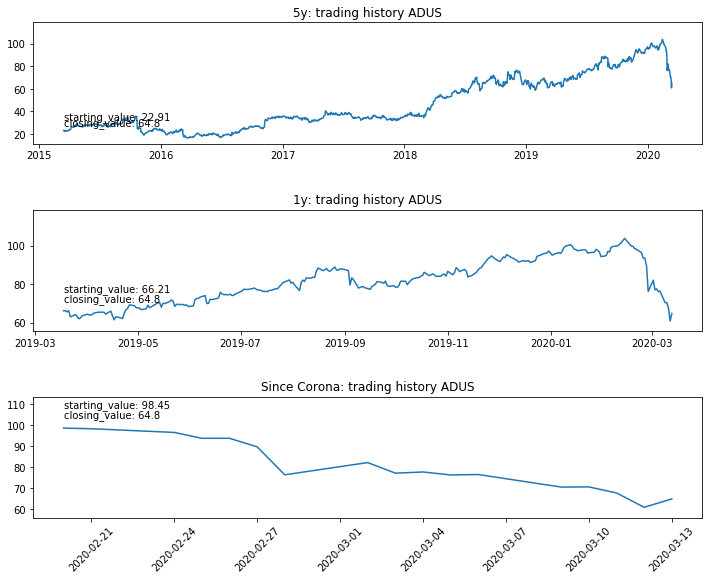

1y:              percent return: 4.50%
Since Corona:    percent return: -38.80%

5y percent return before 21.02.20: 185.48%. Diff to dax: 167.00%
1y percent return before 21.02.20: 43.00%. Diff to dax: 27.08%


In [5]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(4, 1)

plt.figure(figsize = (10,10))

plt.subplot(gs[0, 0])
plt.plot(history_5y)
plt.title(f"5y: trading history {stock.info['symbol']}")
plt.text(history_5y.index[0], history_5y[0]+10, f"starting_value: {history_5y[0]}")
plt.text(history_5y.index[0], history_5y[0]+5, f"closing_value: {history_5y[-1]}")
plt.ylim(min(history_5y)-5, max(history_5y)+15)

plt.subplot(gs[1, 0])
plt.plot(history_1y)
plt.title(f"1y: trading history {stock.info['symbol']}")
plt.text(history_1y.index[0], history_1y[0]+10, f"starting_value: {history_1y[0]}")
plt.text(history_1y.index[0], history_1y[0]+5, f"closing_value: {history_1y[-1]}")
plt.ylim(min(history_1y)-5, max(history_1y)+15)

plt.subplot(gs[2, 0])
plt.plot(history_since_corona)
plt.title(f"Since Corona: trading history {stock.info['symbol']}")
plt.text(history_since_corona.index[0], history_since_corona[0]+10, f"starting_value: {history_since_corona[0]}")
plt.text(history_since_corona.index[0], history_since_corona[0]+5, f"closing_value: {history_since_corona[-1]}")
plt.ylim(min(history_since_corona)-5, max(history_since_corona)+15)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## calc returns
print(f"1y:              percent return: {ret_1y:.2%}")
print(f"Since Corona:    percent return: {ret_since_corona:.2%}\n")

## calc returns w/o Corona & compare with DAX
print(f"5y percent return before 21.02.20: {ret_5y_wo_corona:.2%}. Diff to dax: {perc_diff_dax_5y_wo_corona:.2%}")
print(f"1y percent return before 21.02.20: {ret_1y_wo_corona:.2%}. Diff to dax: {perc_diff_dax_1y_wo_corona:.2%}")